
Привет очередной раз, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>







<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Приятно было снова проверять твою работу
- Я постарался оставить полезные советы, надеюсь они тебе пригодятся.
- Увы, я обнаружил небольшие недочеты  в работе, но я думаю  у тебя не займет много усилий их исправить.
- Давай еще разок


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за усердность!
- Было приятно с тобой сотрудничать.
- Недочеты исправлены - работа полностью корректна
- Не буду больше задерживать, продолжай в том же духе.


# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install category_encoders

     |████████████████████████████████| 81 kB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm
import category_encoders as ce

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split,
    cross_val_score
)

from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    make_scorer
)


<div class="alert alert-block alert-success">
    
<b>Успех:</b> Импорты на месте
</div>

In [4]:
data_old = pd.read_csv('/datasets/autos.csv')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,0
Repaired,20.100000
VehicleType,10.600000
FuelType,9.300000
Gearbox,5.600000
Model,5.600000
DateCrawled,0.000000
Price,0.000000
RegistrationYear,0.000000
Power,0.000000
Kilometer,0.000000


Количество явных дубликатов: 4


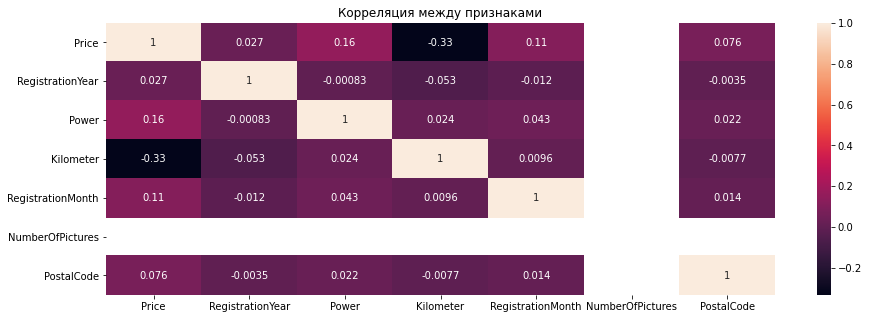

In [5]:
display(data_old.head())
data_old.info()
print('')
print('Количество пропусков:', data_old.isna().sum())
display(pd.DataFrame(round(data_old.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm'))
print('Количество явных дубликатов:', data_old.duplicated().sum())
plt.figure(figsize = (15,5))
sns.heatmap(data_old.corr(), annot = True)
plt.title('Корреляция между признаками')
plt.show()

Всего 15 колонок и 354369 строк. 

1) Признаки: DateCrawled, DateCreated, LastSeen относятся к типу данных object, хотя это дата и время;

2) Пропущенные значения: Repaired (20%), VehicleType (10%), FuelType (9%), Gearbox (5%), Model (5%);

3) Количество явных дубликатов: 4;

4) Корреляции между признаками нет, кроме слабой - между ценой и пробегом.


<div class="alert alert-block alert-success">
    
<b>Успех:</b> Первичный осмотр проведен
</div>

In [6]:
data_repaired = data_old.query('Repaired == "yes"')

data_repaired.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
11,2016-04-07 10:06:22,2799,wagon,2005,manual,140,passat,150000,12,gasoline,volkswagen,yes,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17
24,2016-03-13 20:40:49,500,sedan,1990,manual,118,other,150000,10,petrol,mercedes_benz,yes,2016-03-13 00:00:00,0,35390,2016-03-13 20:40:49
25,2016-03-18 21:44:09,2500,wagon,2002,auto,193,5er,150000,9,gasoline,bmw,yes,2016-03-18 00:00:00,0,73765,2016-03-18 21:44:09


In [7]:
data_repaired[['RegistrationYear', 'Kilometer']].describe()

,RegistrationYear,Kilometer
count,36054.000000,36054.000000
mean,2001.617796,136178.093970
std,44.946167,32156.531739
min,1000.000000,5000.000000
25%,1998.000000,150000.000000
50%,2001.000000,150000.000000
75%,2005.000000,150000.000000
max,9000.000000,150000.000000


In [8]:
data_old['Kilometer'].unique()

array([150000, 125000,  90000,  40000,  30000,  70000,   5000, 100000,
        60000,  20000,  80000,  50000,  10000])

Большинство автомобилей, которые имели ремонт, были выпущены до 2006 г. и с пробегом более 150000 км. Исходя из этого, сделаем допущение, что пропущенные значения для автомобилей с таким же пробегом и возрастом, соответствуют наличию ремонта. 

In [9]:
data_old.loc[(data_old['RegistrationYear'] <= 2005) 
         & (data_old['Kilometer'] >= 150000), 'Repaired'] = data_old.loc[(data_old['RegistrationYear'] <= 2005) & 
                                                                 (data_old['Kilometer'] >= 150000), 'Repaired'].fillna('yes')

In [10]:
display(pd.DataFrame(round(data_old.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm'))

,0
VehicleType,10.600000
FuelType,9.300000
Repaired,8.800000
Gearbox,5.600000
Model,5.600000
DateCrawled,0.000000
Price,0.000000
RegistrationYear,0.000000
Power,0.000000
Kilometer,0.000000


In [11]:
display(data_old['DateCrawled'].min())
data_old['DateCrawled'].max()

'2016-03-05 14:06:22'

'2016-04-07 14:36:58'

Удалим признаки, которые не будут влиять на стоимость автомобиля или будут, но незначимо. 

In [12]:
data = data_old.drop(['NumberOfPictures', 'RegistrationMonth', 'PostalCode', 'DateCrawled', 'DateCreated', 'LastSeen'], axis=1)

<div class="alert alert-block alert-success">
<b>Успех:</b> Согласен с перечнем неинформативных колонок
</div>

Удалим строки, где нет указаний на модель, так как восстановить ее будет сложно, а признак, вероятно, будет определять стоимость. 

In [13]:
data = data.dropna(subset=['Model'], axis=0)

In [14]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


In [15]:
data.describe()

,Price,RegistrationYear,Power,Kilometer
count,334664.000000,334664.000000,334664.000000,334664.000000
mean,4504.346790,2003.923992,111.373195,128562.588148
std,4531.438572,69.377219,185.156439,37205.926976
min,0.000000,1000.000000,0.000000,5000.000000
25%,1150.000000,1999.000000,70.000000,125000.000000
50%,2800.000000,2003.000000,105.000000,150000.000000
75%,6500.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


Из таблицы видно, что в столбцах: цена, год регистрации, мощность могут находиться аномальные значения. 

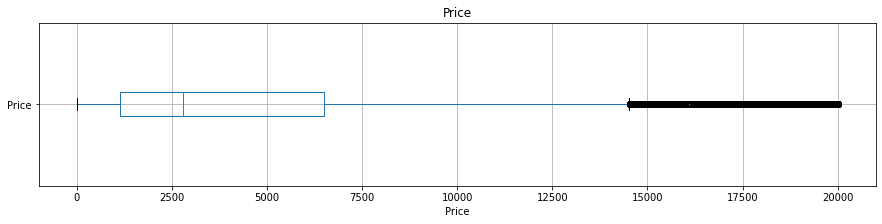

In [16]:
data.boxplot('Price', vert=False, figsize=(15, 3))
plt.xlabel('Price')
plt.title('Price')
plt.show()

In [17]:
data.query('Price < 100')

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
40,0,NaN,1990,NaN,0,corsa,150000,petrol,opel,yes
89,1,sedan,1995,manual,113,e_klasse,150000,gasoline,mercedes_benz,no
111,0,NaN,2017,manual,0,golf,5000,petrol,volkswagen,NaN
152,0,bus,2004,manual,101,meriva,150000,lpg,opel,yes
...,...,...,...,...,...,...,...,...,...,...
354238,0,small,2002,manual,60,fiesta,150000,petrol,ford,yes
354248,0,small,1999,manual,53,swift,150000,petrol,suzuki,yes
354277,0,small,1999,manual,37,arosa,150000,petrol,seat,yes
354309,99,small,1999,manual,60,arosa,150000,petrol,seat,yes


0 в качестве цены указан у большинства значений, еще примерно у 1000 цена низкая. Конечно, можно подумать, что продавец хочет просто избавится от машины, но формальная логика говорит, что стоимость автомобиля как металлолома будет больше. Сделаем границу в 100 евро. 

In [18]:
data = data.drop(data.query('Price < 100').index)

<div class="alert alert-block alert-success">
<b>Успех:</b>   Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>


<AxesSubplot:>

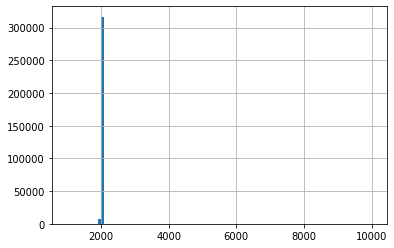

In [19]:
data['RegistrationYear'].hist(bins = 100)

In [20]:
data.query('RegistrationYear > 2016 or RegistrationYear < 1950')

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
15,450,small,1910,NaN,0,ka,5000,petrol,ford,NaN
22,2900,NaN,2018,manual,90,meriva,150000,petrol,opel,no
26,5555,NaN,2017,manual,125,c4,125000,NaN,citroen,no
48,7750,NaN,2017,manual,80,golf,100000,petrol,volkswagen,NaN
51,2000,NaN,2017,manual,90,punto,150000,gasoline,fiat,yes
...,...,...,...,...,...,...,...,...,...,...
354112,3600,NaN,2017,manual,86,transit,150000,gasoline,ford,NaN
354140,1000,NaN,2017,manual,101,a4,150000,NaN,audi,NaN
354203,2140,NaN,2018,manual,80,fiesta,150000,NaN,ford,no
354253,1250,NaN,2018,NaN,0,corsa,150000,petrol,opel,NaN


Указаны колясницы и машины будущего. Последняя дата скачивания анкеты из базы 2016-04-07 14:36:58, но пристутствуют автомобили от 2017 г., что составляет 11844 наблюдений. Интерпретировать данные изменения лучше всего с руководителями сервиса  «Не бит, не крашен», возможно, что дата ошибочная. Скачали базу после обновления, например. Так как точная дата обращения заказчика неизвестна, а количество ошибочных записей большое, чтобы думать, что это несистемная ошибка, удалю данные актуальные на настоящий момент.  

In [21]:
data = data.drop(data.query('RegistrationYear > 2023 or RegistrationYear < 1950').index)


<div class="alert alert-block alert-info">
<b>Совет:</b> Советую посмотреть на дату выгрузки анкет - там тоже можно увидеть полезную информацию по поводу границ года регистраци.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Посмотрел дату выгрузки анкет, изменил умозаключение, которое было, но код оставил прежним. 
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Ок
</div>

<AxesSubplot:>

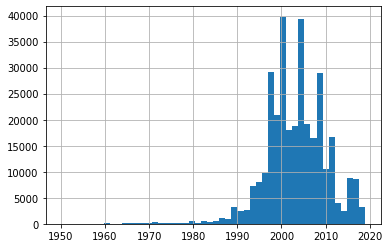

In [22]:
data['RegistrationYear'].hist(bins = 50)

<AxesSubplot:>

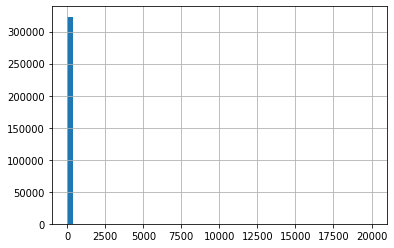

In [23]:
data['Power'].hist(bins = 50)

In [24]:
data.query('Power > 500 or Power < 0.75')

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,yes
32,245,sedan,1994,NaN,0,golf,150000,petrol,volkswagen,no
37,1500,NaN,2016,NaN,0,kangoo,150000,gasoline,renault,no
54,4700,wagon,2005,manual,0,signum,150000,NaN,opel,no
55,550,wagon,1999,manual,0,astra,150000,gasoline,opel,yes
...,...,...,...,...,...,...,...,...,...,...
354332,7900,bus,2007,manual,0,b_klasse,125000,petrol,mercedes_benz,no
354335,390,small,1997,auto,0,corsa,100000,petrol,opel,yes
354336,3299,NaN,2005,auto,0,outlander,150000,petrol,mitsubishi,yes
354346,2600,NaN,2005,auto,0,c_klasse,150000,NaN,mercedes_benz,yes


<AxesSubplot:>

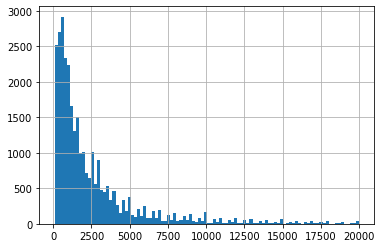

In [25]:
data.query('Power == 0')['Price'].hist(bins = 100)

In [26]:
data.loc[(data['Power'] > 500) | ((data['Power'] < 0.75) & (data['Power'] != 0)),'Power']

1816      1398
4060       953
5328      1001
6296       603
6504       771
          ... 
348968    1241
351947    1001
353493    2000
353633     650
354260    1103
Name: Power, Length: 366, dtype: int64

366 машин имеют мощность, которая не соответствует раельности. Заменим значения на пропуски, чтоб потом их можно было заполнить.

In [27]:
data.loc[(data['Power'] > 500) | ((data['Power'] < 0.75) & (data['Power'] != 0)),'Power'] = np.nan



<div class="alert alert-block alert-info">
<b>Совет:</b>  Вопрос на подумать: Как думаешь а машины с 0-ой мощностью могут быть просто без двигателя?
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Веротяно, да. Оставил машины с 0 мощностью без изменений.
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Но здесь я бы не спешил. Нужно подумать нужны ли нашему сервису такие автомобили в качестве примеров?
</div>

In [28]:
missing_values = data['Power'].isnull().sum()
print("Количество пропущенных значений в столбце Power:", missing_values)

Количество пропущенных значений в столбце Power: 366


In [29]:
data['Power'] = data.groupby(['Model', 'Brand'])['Power'].transform(lambda x: x.fillna(x.median()) if x.notnull().any() else x)

In [30]:
missing_values = data['Power'].isnull().sum()
print("Количество пропущенных значений в столбце Power:", missing_values)

Количество пропущенных значений в столбце Power: 0


<AxesSubplot:>

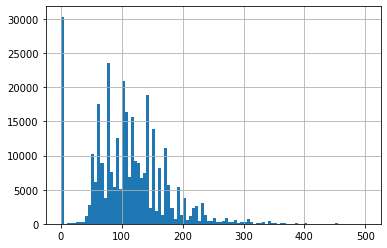

In [31]:
data['Power'].hist(bins = 100)

<AxesSubplot:>

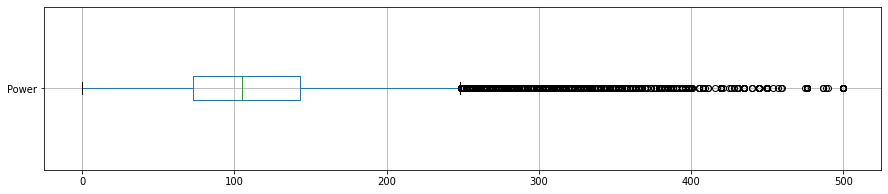

In [32]:
data.boxplot('Power', vert = False, figsize = (15,3))

In [33]:
data.loc[data['Power'] == 0,'Power']

0         0.0
32        0.0
37        0.0
54        0.0
55        0.0
         ... 
354332    0.0
354335    0.0
354336    0.0
354346    0.0
354363    0.0
Name: Power, Length: 30321, dtype: float64

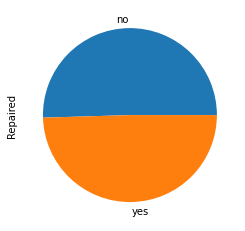

In [34]:
repaired_counts = data.loc[data['Power'] == 0, 'Repaired'].value_counts()
repaired_counts.plot(kind='pie')
plt.show()

In [35]:
print('Медиана стоимости автомобиля без двигателя:', data.loc[data['Power'] == 0,'Price'].median())
print('Медиана стоимости автомобиля с двигателем:', data.loc[data['Power'] != 0,'Price'].median())

Медиана стоимости автомобиля без двигателя: 1399.0
Медиана стоимости автомобиля с двигателем: 3200.0


Если решить, что мощность, равная 0, соответствует машинам без двигателя, то смущает такое большое количество (более 30321). Стоит посоветоваться с экспертами рынка, чтобы узнать, является ли это аномалией. Половина этих машин не подвергалась ремонту, то есть, как только сгорал двигатель, то машину сразу стремились продать. Тоже вопрос, соответствует ли это реальной жизни...Но судя по медиане стоимости, машины без двигателя в среднем стоят в 2 раза меньше, что похоже на правду.  

In [36]:
display(pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm'))

,0
VehicleType,8.400000
Repaired,7.500000
FuelType,7.000000
Gearbox,4.200000
Price,0.000000
RegistrationYear,0.000000
Power,0.000000
Model,0.000000
Kilometer,0.000000
Brand,0.000000


Тип коробки передач, вид топлива, тип кузова можно примерно восстановить, зная модель и марку автомобиля.

In [37]:
data['Gearbox'] = data.groupby(['Model', 'Brand'])['Gearbox'].transform(lambda x: x.fillna(x.mode().iloc[0]) if x.notnull().any() else x)

In [38]:
#data['FuelType'] = data.groupby(['Model', 'Brand'])['FuelType'].transform(lambda x: x.fillna(x.mode().iloc[0]))

data['FuelType'] = data.groupby(['Model', 'Brand', 'Gearbox'])['FuelType'].transform(lambda x: x.fillna(x.mode().iloc[0]) if x.notnull().any() else x)

In [39]:
data['Repaired'] = data.groupby(['Model', 'Brand', 'Gearbox', 'FuelType'])['Repaired'].transform(lambda x: x.fillna(x.mode().iloc[0]) if x.notnull().any() else x)

In [40]:
data.loc[data['Model'] == 'golf']['VehicleType'].unique()

array([nan, 'small', 'sedan', 'bus', 'other', 'wagon', 'convertible',
       'coupe', 'suv'], dtype=object)

In [41]:
data['VehicleType'] = data.groupby(['Model', 'Brand', 'Gearbox', 'FuelType'])['VehicleType'].transform(lambda x: x.fillna(x.mode().iloc[0]) if x.notnull().any() else x)

In [42]:
display(pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm'))

,0
VehicleType,0.000000
Repaired,0.000000
Price,0.000000
RegistrationYear,0.000000
Gearbox,0.000000
Power,0.000000
Model,0.000000
Kilometer,0.000000
FuelType,0.000000
Brand,0.000000


In [43]:
data['FuelType'].unique()

array(['petrol', 'gasoline', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
      dtype=object)

- petrol', 'gasoline' - вид топлива бензин;
- 'lpg', 'cng' - - вид топлива газ.

Объединим их.

In [44]:
data.loc[data['FuelType'] == 'petrol', 'FuelType'] = 'gasoline'
data.loc[data['FuelType'] == 'lpg', 'FuelType'] = 'cng'

In [45]:
data['FuelType'].unique()

array(['gasoline', 'cng', 'other', 'hybrid', 'electric'], dtype=object)

<div class="alert alert-block alert-success">
<b>Успех:</b>  Пропуски обработаны хорошим образом
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b> У fuel_type есть категории, которые означают одно и тоже - их можно объединить, либо подумать может они действительно означают, что-то разное.
</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Поправил fuel_type.
</div>


<div class="alert alert-block alert-info">
<b>Совет[2]:</b> Насчет бензина согласен, а вот газ, как по мне, имеет важные различия, поэтому газ лучше не объединять
</div>

In [46]:
data = data.dropna()

**Промежуточный вывод**

Были предоставлены данные, которые имели 15 колонок и 354369 строк.

1) Признаки: DateCrawled, DateCreated, LastSeen относились к типу данных object, хотя это дата и время;

2) Пропущенные значения были в колонках: Repaired (20%), VehicleType (10%), FuelType (9%), Gearbox (5%), Model (5%);

3) Количество явных дубликатов было: 4;

4) Корреляции между признаками не было, кроме слабой - между пробегом и целевым признаком ценой.

5) В столбцах: цена, год регистрации, мощность находились аномальные значения.

Столбцы NumberOfPictures, RegistrationMonth, PostalCode, DateCrawled, DateCreated, LastSeen были удалены, так как их значение на стоимость автомобиля, вероятно, незначимо. Также были удаления строки, где не была указана модель, так как восстановить признак было бы невозможно логическим путем. 10642 наблюдений имели 0 в качестве цены, еще около 1000 цена была очень низкая. Учитывая, что это целевой признак, были сохранены только наблюдения с ценой выше 99 евро. Также были удалены наблюдения с годом регистрации автомобиля позже 2023 и раньше 1950 гг. 

Обратить внимание. Последняя дата скачивания анкеты из базы 2016-04-07 14:36:58, но пристутствуют автомобили от 2017 г., что составляет 11844 наблюдений. Интерпретировать данные изменения лучше всего с руководителями сервиса «Не бит, не крашен», возможно, что дата ошибочная. Скачали базу после обновления, например. Поэтому было принято решения их сохранить на данный момент.

Часть пропусков в столбце Repaired (автомобили, которые имели ремонт), были заполнены с использованием допущения, что большинство машин, согласно заполненным данным, выпущенных до 2006 г. и с пробегом более 150000 км. имели ремонт. 366 значений в столбце Power (мощность) имели значения, которые мало соответствовали раельности. Они были заменены на медианные значения мощности в соответствии с моделью и брендом. VehicleType (тип кузова), FuelType (вид топлива), Gearbox (тип коробки передач), часть Repaired (ремонт) были приблизетельно восстановлены по моде (самым частым значениям) для своей модель и марки. В столбце вид топлива petrol и gasoline (бензин) и lpg и cng (газ) были объединены.

<div class="alert alert-block alert-success">
<b>Успех:</b> В целом хорошая, детальная предобработка - идем дальше
</div>

### Поработаем с признаками

In [47]:
target = data['Price']
features = data.drop(['Price'], axis = 1)

In [48]:
#features = pd.get_dummies(features_old, columns=['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired'], drop_first=True)


<div class="alert alert-block alert-danger">

<b>Ошибка:</b>  OHE правильный выбор для линейных моделей. Но для всех других моделей выбор плохой (из-за фактора модели, который порождает много факторов), для заказчика важно время обучения и скорость предсказания, а данные модели могут работать и с другими методами кодировками значительно быстреее, не теряя при этом в качестве.

Я тебе могу предложить, что можно сделать:
    
- Сделать 1 набор данных: 
    - Закодировать для всех моделей методом TargetEncoder, BinaryEncoder - вполне универсальные варианты
    - Закодировать все признаки методом OHE, а модель машины методом OE
    - Заменить использование линейных моделей (так как их рассмотрение не обязательно) и использовать единственный метод кодировки OE.
- Сделать 2 набора данных
    - Закодировать для линейных моделей методом OHE, для остальных OE (или внутренний метод кодирования данных)
    
P.S. Отмечу, что encoder правильно применять после разбиения данных и обучать только на обучающей выборке, для остальных выборок просто использовать transform. Примеры использования с объяснениями можно найти посмотреь https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

И не забывай использовать параметр `handle_unknown`
  
</div>


In [49]:
#pd.set_option('display.max_columns', 400)
#features

In [50]:
features_train_old, features_test_old, target_train_old, target_test_old = train_test_split(
    features, target, test_size = 0.4, random_state = 12345)

In [51]:
features_valid_old, features_test_old, target_valid_old, target_test_old = train_test_split(
    features_test_old, target_test_old, test_size = 0.5, random_state = 12345)

In [52]:
# Создание экземпляра класса BinaryEncoder
encoder = ce.BinaryEncoder(cols=['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired'])

# Преобразование тренировочных и тестовых данных
features_train = encoder.fit_transform(features_train_old)
features_valid = encoder.transform(features_valid_old)
features_test = encoder.transform(features_test_old)

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Воспользовался BinaryEncoder. Сделал валидационную выборку, ранее была только обучающая и тестовая. 
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть контакт
</div>

In [53]:
pd.set_option('display.max_columns', 50)
features_train

,VehicleType_0,VehicleType_1,VehicleType_2,VehicleType_3,RegistrationYear,Gearbox_0,Gearbox_1,Power,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Kilometer,FuelType_0,FuelType_1,FuelType_2,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Repaired_0,Repaired_1
343446,0,0,0,1,2006,0,1,77.0,0,0,0,0,0,0,0,1,50000,0,0,1,0,0,0,0,0,1,0,1
337352,0,0,1,0,2010,0,1,84.0,0,0,0,0,0,0,1,0,150000,0,0,1,0,0,0,0,1,0,0,1
337879,0,0,0,1,2012,1,0,170.0,0,0,0,0,0,0,1,1,40000,0,0,1,0,0,0,0,1,1,0,1
286848,0,0,1,1,2011,0,1,69.0,0,0,0,0,0,1,0,0,70000,0,0,1,0,0,0,1,0,0,1,0
149184,0,1,0,0,2011,1,0,111.0,0,0,0,0,0,1,0,1,150000,0,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173920,0,0,1,0,1999,0,1,0.0,0,0,0,0,0,0,1,1,150000,0,0,1,0,0,1,1,1,0,0,1
52406,0,1,0,0,1990,0,1,94.0,0,1,1,1,1,1,1,0,70000,0,0,1,0,0,0,1,0,1,0,1
94553,0,1,0,0,2001,1,0,0.0,0,0,0,1,0,1,1,1,150000,0,0,1,0,0,1,0,0,0,1,0
84593,0,1,0,0,2017,0,1,143.0,0,0,0,1,0,0,1,0,100000,0,0,1,0,0,1,1,0,1,0,1


In [54]:
numeric = ['RegistrationYear', 'Power', 'Kilometer']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# масштабируем количественные признаки, которые затем будут использованы в моделях градиентного бустинга, так как они имеют свои
# внутренние методы кодировки

features_train_old[numeric] = scaler.transform(features_train_old[numeric])
features_valid_old[numeric] = scaler.transform(features_valid_old[numeric])
features_test_old[numeric] = scaler.transform(features_test_old[numeric])

print(features_valid.head())

        VehicleType_0  VehicleType_1  VehicleType_2  VehicleType_3  \
311764              0              1              0              0   
140943              0              1              0              0   
270740              0              1              0              0   
340664              0              1              1              0   
84441               0              1              0              0   

        RegistrationYear  Gearbox_0  Gearbox_1     Power  Model_0  Model_1  \
311764          0.819439          0          1 -1.774648        0        0   
140943          0.819439          0          1  0.001314        0        0   
270740         -0.622125          0          1 -0.552656        0        0   
340664          0.675283          0          1 -0.063859        0        1   
84441          -0.477968          0          1  0.180539        1        0   

        Model_2  Model_3  Model_4  Model_5  Model_6  Model_7  Kilometer  \
311764        0        0        0  

/tmp/ipykernel_48/945447738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_old[numeric] = scaler.transform(features_train_old[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


<div class="alert alert-block alert-success">
<b>Успех:</b>  Масштабирование проведено корректно

**Промежуточный вывод**

Категориальные переменные были преобразованы в числовые значения методом BinaryEncoder, количественные признаки были масштабированы. Выборка была поделена на обучающую, валидационную и тестовую.

## Обучение моделей

Обучим разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуем разные гиперпараметры.

### Дерево решений

In [55]:
best_model_tree = None
best_result = 5000000
max_depth = None
scores = []

for depth in range(1,11,3):
    model = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    scoring = make_scorer(mean_squared_error, greater_is_better=False)
    scores = cross_val_score(model, features_train, target_train_old, cv = 5, scoring=scoring)
    final_score = abs(np.mean(scores))       
    rmse = final_score ** 0.5
    result = rmse
    if result < best_result:
        best_result = result
        best_model_tree = model
        max_depth = depth        

print("RMSE на обучающей выборке:", best_result, 'и максимальную глубину:', max_depth)

RMSE на обучающей выборке: 2059.121793387171 и максимальную глубину: 10


In [56]:
%%time

best_model_tree.fit(features_train, target_train_old)

CPU times: user 631 ms, sys: 3.87 ms, total: 635 ms
Wall time: 639 ms


DecisionTreeRegressor(max_depth=10, random_state=12345)

In [57]:
%%time

predict_valid_tree = best_model_tree.predict(features_valid)

CPU times: user 15.3 ms, sys: 3.96 ms, total: 19.3 ms
Wall time: 17.9 ms


In [58]:
mse = mean_squared_error(target_valid_old, predict_valid_tree)
rmse = mse ** 0.5

print("RMSE на валидационной выборке:", rmse)

RMSE на валидационной выборке: 2052.8470228799742


### Случайный лес

In [59]:
best_model_forest = None
best_result = 5000000
max_depth = None
n_estimators = None
scores = []

for depth in range(1,10,3):
     for est in range(20,40,20):
        model = RandomForestRegressor(max_depth = depth, n_estimators = est, random_state = 12345)
        scores = cross_val_score(model, features_train, target_train_old, cv = 5, scoring=scoring)
        final_score = abs(np.mean(scores))       
        rmse = final_score ** 0.5
        result = rmse
        if result < best_result:
            best_result = result
            best_model_forest = model
            max_depth = depth
            n_estimators = est

print("RMSE на обучающей выборке:", best_result,',','число деревьев:', n_estimators,' и максимальную глубину:', max_depth)

RMSE на обучающей выборке: 2180.467946549201 , число деревьев: 20  и максимальную глубину: 7


In [60]:
%%time

best_model_forest.fit(features_train, target_train_old)

CPU times: user 6.01 s, sys: 7.46 ms, total: 6.02 s
Wall time: 6.03 s


RandomForestRegressor(max_depth=7, n_estimators=20, random_state=12345)

In [61]:
%%time

predict_valid_forest = best_model_forest.predict(features_valid)

CPU times: user 81.8 ms, sys: 44 µs, total: 81.8 ms
Wall time: 84.9 ms


In [62]:
mse = mean_squared_error(target_valid_old, predict_valid_forest)
rmse = mse ** 0.5

print("RMSE на валидационной выборке:", rmse)

RMSE на валидационной выборке: 2191.090518153201


### CatBoost

При использовании CatBoost мы не должны пользоваться one-hot кодированием, поскольку это влияет на скорость обучения и на качество прогнозов. Вместо этого зададим категориальные признаки с помощью параметра cat_features.

<div class="alert alert-block alert-success">
<b>Успех:</b> Верно, но с другими моделями аналогичный нюанс
</div>

In [63]:
best_model_cat = None
best_result = 5000000
max_iter = None
scores = []

for iter in range(990,1001,10):
    cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']
    model = CatBoostRegressor(iterations=iter, random_state=12345, cat_features=cat_features)
    scoring = make_scorer(mean_squared_error, greater_is_better=False)
    model.fit(features_train_old, target_train_old, verbose=100, plot=True)
    scores = cross_val_score(model, features_train_old, target_train_old, cv=2, scoring=scoring)
    final_score = abs(np.mean(scores))
    rmse = final_score ** 0.5
    result = rmse
    if result < best_result:
        best_result = result
        best_model_cat = model
        max_iter = iter
               
print("RMSE на обучающей выборке:", best_result,', число деревьев:', max_iter)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.094909
0:	learn: 4268.8942823	total: 286ms	remaining: 4m 42s
100:	learn: 1810.0575352	total: 13.6s	remaining: 1m 59s
200:	learn: 1726.4290721	total: 27.3s	remaining: 1m 47s
300:	learn: 1683.5363531	total: 40.6s	remaining: 1m 32s
400:	learn: 1657.4342149	total: 54.5s	remaining: 1m 20s
500:	learn: 1638.3172451	total: 1m 8s	remaining: 1m 6s
600:	learn: 1620.7361912	total: 1m 22s	remaining: 53.2s
700:	learn: 1606.6548928	total: 1m 36s	remaining: 39.7s
800:	learn: 1594.1336106	total: 1m 49s	remaining: 25.9s
900:	learn: 1584.3112480	total: 2m 4s	remaining: 12.2s
989:	learn: 1576.6581435	total: 2m 16s	remaining: 0us
Learning rate set to 0.085064
0:	learn: 4281.5345436	total: 91ms	remaining: 1m 30s
1:	learn: 4057.5037789	total: 174ms	remaining: 1m 25s
2:	learn: 3861.3291395	total: 273ms	remaining: 1m 29s
3:	learn: 3679.6383056	total: 375ms	remaining: 1m 32s
4:	learn: 3517.9779464	total: 459ms	remaining: 1m 30s
5:	learn: 3377.5331566	total: 530ms	remaining: 1m 26s
6:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.094137
0:	learn: 4270.9967512	total: 189ms	remaining: 3m 9s
100:	learn: 1814.7350909	total: 13.4s	remaining: 1m 59s
200:	learn: 1730.8580126	total: 26.6s	remaining: 1m 45s
300:	learn: 1687.1351904	total: 40.1s	remaining: 1m 33s
400:	learn: 1661.1033353	total: 53.4s	remaining: 1m 19s
500:	learn: 1639.8473668	total: 1m 6s	remaining: 1m 6s
600:	learn: 1623.3726159	total: 1m 20s	remaining: 53.6s
700:	learn: 1609.7369084	total: 1m 34s	remaining: 40.4s
800:	learn: 1596.4610316	total: 1m 49s	remaining: 27.3s
900:	learn: 1584.9770387	total: 2m 3s	remaining: 13.6s
999:	learn: 1576.0929785	total: 2m 17s	remaining: 0us
Learning rate set to 0.084372
0:	learn: 4283.4689248	total: 87.3ms	remaining: 1m 27s
1:	learn: 4061.0338609	total: 170ms	remaining: 1m 24s
2:	learn: 3866.0555463	total: 267ms	remaining: 1m 28s
3:	learn: 3685.3833385	total: 368ms	remaining: 1m 31s
4:	learn: 3524.4642423	total: 448ms	remaining: 1m 29s
5:	learn: 3384.4926029	total: 516ms	remaining: 1m 25s
6:	lea

In [64]:
%%time

best_model_cat.fit(features_train_old, target_train_old, cat_features=cat_features, verbose = 0)

CPU times: user 2min 12s, sys: 536 ms, total: 2min 13s
Wall time: 2min 14s


In [65]:
%%time

predict_valid_cat = best_model_cat.predict(features_valid_old)

CPU times: user 443 ms, sys: 0 ns, total: 443 ms
Wall time: 446 ms


In [66]:
mse = mean_squared_error(target_valid_old, predict_valid_cat)
rmse = mse ** 0.5

print("RMSE на валидационной выборке:", rmse)

RMSE на валидационной выборке: 1640.6311770658974


### LGBMBoost


<div class="alert alert-block alert-info">
<b>Совет:</b>  У LGBM тоже есть внутренний метод кодировки данных, который хорошо было бы попробовать
</div>


In [67]:
param_grid = {
    'max_depth': np.arange(1, 7, 3),
    'n_estimators': np.arange(20, 41, 20)
}

categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

features_train_old[categorical_features] = features_train_old[categorical_features].astype('category')

model = LGBMRegressor(verbose=200, cat_features = categorical_features, random_state=12345)

random_search = RandomizedSearchCV(
    estimator=model, param_distributions=param_grid, cv=3, n_iter=10, scoring='neg_mean_squared_error', random_state=123)
random_search.fit(features_train_old, target_train_old)

best_params = random_search.best_params_
best_score = random_search.best_score_

best_model = LGBMRegressor(**best_params)

best_model.fit(features_train_old, target_train_old)

predict_train_LGBM_RS = best_model.predict(features_train_old)
mse = mean_squared_error(target_train_old, predict_train_LGBM_RS)
rmse = mse ** 0.5

print("RMSE на обучающей выборке:", rmse, ", Best Model Hyperparameters:", best_params)

[LightGBM] [Warning] Unknown parameter: cat_features


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: cat_features
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.863304
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.299272
[LightGBM] [Debug] init for col-wise cost 0.086875 seconds, init for row-wise cost 0.007743 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.176731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 129536, number of used features: 9
[LightGBM] [Info] Start training from score 4658.354542
[LightGBM] [Debug] Trained a tree with leaves = 2 and depth = 1
[LightGBM] [Debug] Trained a tree with leaves = 2 and depth = 1
[LightGBM] [Debug] Trained a tree with leaves = 2 and depth = 1
[LightGBM] [Debug] Trained a tree with le

In [68]:
%%time

best_model.fit(features_train_old, target_train_old)

CPU times: user 1.89 s, sys: 7.92 ms, total: 1.89 s
Wall time: 1.9 s


LGBMRegressor(max_depth=4, n_estimators=40)

In [69]:
%%time

features_valid_old[categorical_features] = features_valid_old[categorical_features].astype('category')

predict_valid_lgbm = best_model.predict(features_valid_old)

CPU times: user 223 ms, sys: 51 µs, total: 223 ms
Wall time: 202 ms


In [70]:
mse = mean_squared_error(target_valid_old, predict_valid_lgbm)
rmse = mse ** 0.5

print("RMSE на валидационной выборке:", rmse)

RMSE на валидационной выборке: 1860.463627711722


**Промежуточный вывод**

1) DecisionTree: обучение 623 ms, предсказание 19.7 ms и RMSE на валидационной выборке: 2052.

2) RandomForest: обучение 6.51 s, предсказания 87.8 ms и RMSE на валидационной выборке: 2191.

3) CatBoost: обучение 2min 17s, предсказания 417 ms и RMSE на валидационной выборке: 1640.

4) LGBMBoost: обучение 1.63 s, предсказание 128 ms и RMSE на валидационной выборке: 1860.

- качество предсказания:CatBoost, LGBMBoost, DecisionTree. 
- время обучения модели: DecisionTree, LGBMBoost, RandomForest.  
- время предсказания модели: DecisionTree, RandomForest, LGBMBoost

CatBoost обучается в разы медленнее, даже с испольщованием 2-кросс валидационных выборок (у LGBMBoost 3). Нельзя сказать, что разница с LGBMBoost в качестве незначительная, но все же, учитывая пожелания заказчика LGBMBoost предпочтительнее ввиду баланса времени обучения и качества предсказания.


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Ты немного не правильно понял метрики времени: Нам нужно время обучения и время предсказания  вычислить  и проанализировать отдельно друг от друга
    
- время обучения это  чистый `.fit()` модели - без подбора гиперпараметров и без предсказаний
    
- время предсказания это только `.predict()` без обучения

p.s. можно вытаскивать  все  метрики  интересующие заказчика лаконично из GridSearchCV/RandomizedSearchCV, все они лежат в `.cv_results_`
</div>



<div class="alert alert-block alert-warning">
<b>Изменения:</b> Поправил.
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Все метрики корректно вычислены и проанализированы, выбор модели обоснован
</div>

## Анализ выбранной модели

In [71]:
%%time

features_test_old[categorical_features] = features_test_old[categorical_features].astype('category')

predict_test_lgbm = best_model.predict(features_test_old)

CPU times: user 219 ms, sys: 0 ns, total: 219 ms
Wall time: 194 ms


In [72]:
mse = mean_squared_error(target_test_old, predict_test_lgbm)
rmse = mse ** 0.5

print("RMSE на тестовой выборке:", rmse)

RMSE на тестовой выборке: 1860.3325205200229


In [73]:
def importances(model,features):
    features=features.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    plt.figure(figsize=(10, 5))
    plt.title('Важность функции')
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), features[indices])
    plt.xlabel('Относительная важность')
    plt.show()

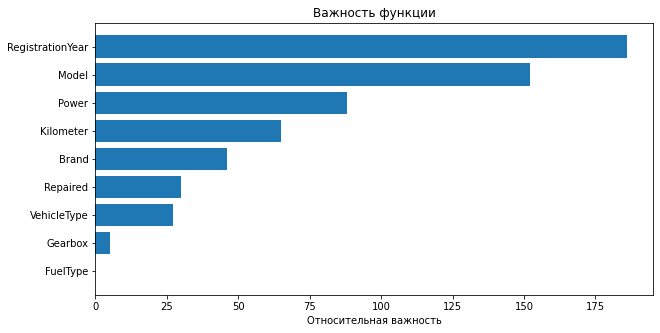

In [74]:
importances(best_model,features_test_old)


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> На тестовой выборке получено хорошее качество
</div>

**Промежуточный вывод**

Модель LGBMboost показала воспроизводимую метрику RMSE на тествой выборке: 1860. Наиболее важные признаки, влияющие на предсказание модели, это:
- год регистрации автомобиля
- модель
- мощность.

<div class="alert alert-block alert-danger">
   
<b>Ошибка:</b>
   
- Тестовую выборку мы не должны использовать при вычислении метрик для анализа. Она должна использоваться только для единственной лучшей модели после анализа  в шаге с тестированием.
- У нас заданы 3 метрики интересующие заказчика: `время обучения: .fit()`, `скорость предсказания: .predict()` и `качество: RMSE`. Эти метрики мы получаем и анализируем отдельно друг от друга (не на тестовой выборке и без учета времени подбора  гиперпаметров) 
- Получить их можем либо с помощью валидационной выборки либо используя кросс-валидационные методы (в GridSearchCV например есть все данные метрики в аттрибуте cv_results_).   В случае если не используется ни gridsearch ни валидационная выборка, то можно время предсказания замерить на тренировочной (качество так замерить нельзя).
- Потом проводится анализ и выбирается ОДНА наилучшая модель.
- И только затем для ОДНОЙ наилучшей модели  проводится тестирование.
  
Исправь пожалуйста это здесь и везде внизу
</div>


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> После анализа и выбора одной наилучшей модели, должно идти  ее тестирование. Другие модели тестовую выборку использовать не должны.
</div>


## Общий вывод

Были предоставлены данные, которые имели 15 колонок и 354369 строк. Были пропущенные и аномальные значения.

Столбцы NumberOfPictures, RegistrationMonth, PostalCode, DateCrawled, DateCreated, LastSeen были удалены, так как их значение на стоимость автомобиля, вероятно, незначимо. Также были удаления строки, где не была указана модель, так как восстановить признак было бы невозможно логическим путем. 10642 наблюдений имели 0 в качестве цены, еще около 1000 цена была очень низкая. Учитывая, что это целевой признак, были сохранены только наблюдения с ценой выше 99 евро. Также были удалены наблюдения с годом регистрации автомобиля позже 2023 и раньше 1950 гг. 

Часть пропусков в столбце Repaired (автомобили, которые имели ремонт), были заполнены с использованием допущения, что большинство машин, согласно заполненным данным, выпущенных до 2006 г. и с пробегом более 150000 км. имели ремонт. 366 значений в столбце Power (мощность) имели значения, которые мало соответствовали раельности. Они были заменены на медианные значения мощности в соответствии с моделью и брендом. VehicleType (тип кузова), FuelType (вид топлива), Gearbox (тип коробки передач), часть Repaired (ремонт) были приблизетельно восстановлены по моде (самым частым значениям) для своей модель и марки. В столбце вид топлива petrol и gasoline (бензин) и lpg и cng (газ) были объединены.

Категориальные переменные были преобразованы в числовые значения методом BinaryEncoder, количественные признаки были масштабированы. Выборка была поделена на обучающую, валидационную и тестовую. 

При предсказании на валидационное выборке CatBoost имела самый низкий rmse 1640, затраченное на обучение составило 2min 17s. 

В целом, модели можно было разделить по параметрам от лучшего к худшему в следующем порядке:

- качество предсказания:CatBoost, LGBMBoost, DecisionTree.
- время обучения модели: DecisionTree, LGBMBoost, RandomForest.
- время предсказания модели: DecisionTree, RandomForest, LGBMBoost

CatBoost обучается в раза медленнее. Нельзя сказать, что разница с LGBMBoost в качестве незначительная (1640 против 1860), но все же, учитывая пожелания заказчика LGBMBoost предпочтительнее ввиду баланса времени обучения и качества предсказания (2min 31s против 1.7s).

Модель LGBMboost показала воспроизводимую метрику RMSE на тествой выборке: 1860. Наиболее важные признаки, влияющие на предсказание модели, это:
- год регистрации автомобиля
- модель
- мощность.

Учитывая важность этих признаков:
1) Обратить внимание. Последняя дата скачивания анкеты из базы 2016-04-07 14:36:58, но пристутствуют автомобили от 2017 г., что составляет 11844 наблюдений. Интерпретировать данные изменения лучше всего с руководителями сервиса «Не бит, не крашен», возможно, что дата ошибочная. Скачали базу после обновления, например. В ходе предсказания данные от 2017 до 2023 г. были сохранены. 

2) 30321 автомобиля имели мощность 0. Было взято допущение, что это машины без двигателя, так как медианная цена на них в 2 раза ниже. Все же стоит посоветоваться с экспертами рынка, чтобы узнать, является ли это аномалией (около 10% база данных). 


<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Напомню, что для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>


</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [х]  Весь код выполняется без ошибок
- [х]  Ячейки с кодом расположены в порядке исполнения
- [х]  Выполнена загрузка и подготовка данных
- [х]  Выполнено обучение моделей
- [х]  Есть анализ скорости работы и качества моделей